In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 
import matplotlib.cm as cm 
import random 
from scipy.special import expit as sigmoid

In [3]:
#how to work with .mat files in python.
#training set of handwritten digits
data = 'ex3data1.mat'
mat = scipy.io.loadmat(data)

X, Y= mat['X'], mat['y']

X[1][:]    1first row, which represents a training example:
each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.

In [ ]:
#TODO:have to assign 1's column to X

#### 1.2 Visualizing the data

This was a very good exercise in data manipulation, i learned a lot. i had to take out my pen and paper to work it out and it took quite some time to implement it. But now i feel more confident manipulating any information contained in a big fat matrix.

In [6]:
def display_data(X,Y,sample_rows=100):
    #sample rows has to be square
    
    width=20
    height=20

    row_dim=int(np.sqrt(sample_rows)*height)
    col_dim=row_dim

    matrix=np.zeros((row_dim,col_dim)).astype(float)

    random_index=random.sample(range(0,4000), sample_rows)

    row_i=0
    col_i=0
    for i in random_index:
        

        random_row=X[i][:]
        X_row_matrix=np.reshape(random_row,(20,20)).T

        matrix[ height*row_i : height*(row_i+1) , width*col_i : width*(col_i+1)]=X_row_matrix
        #the submatrix shape will be 20 by 20. and from a given row, it will go columnwise
        #(as opposed to the converse, namely that for a given column, go row-wise)
        #there probably exists a name for this but i dont know it. drawing pictures help.
        #for this submatrix (that is populated by zeros), assign it the X_row_matrix

        col_i+=1
        #for the given row_i, increment col_i

        if col_i==matrix.shape[1]/height:
            #i,e we have looped through col_i until the end of the col_dim
          
            row_i+=1
            col_i=0
            #then we want to reset the col index and start on a new row

            #we do not need the same kind of reset-mechanism on row_i since random_index, by construction, has just the correct length

    return matrix


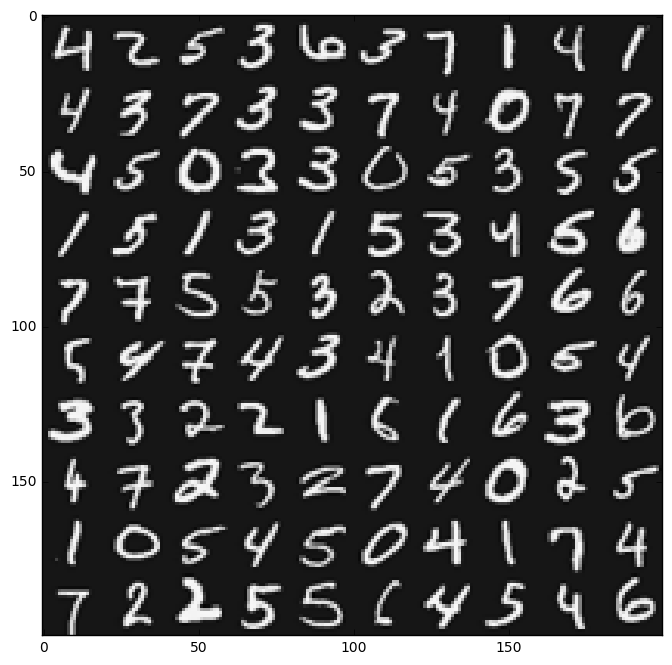

In [7]:
tst_matrix=display_data(X,Y)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

#### 1.3 Vectorizing Logistic Regression

"You can use your code in the last exercise as a starting point
for this exercise."-pdf

#### 1.3.1 Vectorizing the cost function

In [9]:
def cost_function2(theta_array, X,Y):
    m=len(Y)
    h_x=sigmoid(np.dot(X,theta_array.T))

    term1=np.dot(np.log(h_x),-Y.T)
    term2=np.dot(np.log(1-h_x),(1-Y).T)

    return (term1-term2)/m